## Amazon book reviews Part II: Overall ratings and helpfulness

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

The first element in the helpful column in the original dataset is the number of helpful votes and the second element represents the total vote. I created a percentage rating column based on (helpful/total). [Note that 90/100 will have the same percentage rating as 9/10 but we are assuming that they are same]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
query1 = "SELECT reviewerID, overall, helpfulVote, totalVote FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2011-01-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [3]:
project_id = 'dotted-chiller-156222'

In [4]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.96 s. Waiting...
  Elapsed 22.61 s. Waiting...
Query done.
Processed: 405.1 Mb

Retrieving results...
  Got page: 1; 4.0% done. Elapsed 29.81 s.
  Got page: 2; 8.0% done. Elapsed 35.75 s.
  Got page: 3; 12.0% done. Elapsed 41.96 s.
  Got page: 4; 16.0% done. Elapsed 47.99 s.
  Got page: 5; 20.0% done. Elapsed 55.0 s.
  Got page: 6; 24.0% done. Elapsed 60.77 s.
  Got page: 7; 28.0% done. Elapsed 67.02 s.
  Got page: 8; 32.0% done. Elapsed 73.79 s.
  Got page: 9; 36.0% done. Elapsed 79.12 s.
  Got page: 10; 40.0% done. Elapsed 85.17 s.
  Got page: 11; 44.0% done. Elapsed 91.08 s.
  Got page: 12; 48.0% done. Elapsed 97.19 s.
  Got page: 13; 52.0% done. Elapsed 103.56 s.
  Got page: 14; 56.0% done. Elapsed 108.19 s.
  Got page: 15; 60.0% done. Elapsed 113.5 s.
  Got page: 16; 64.0% done. Elapsed 119.26 s.
  Got page: 17; 68.0% done. Elapsed 126.41 s.
  Got page: 18; 73.0% done. Elapsed 131.94 s.
  Got page: 19; 77.0% done. Elapsed 139.7

In [5]:
da.head(1)

,reviewerID,overall,helpfulVote,totalVote
0,A320TMDV6KCFU,5,7,7


In [6]:
query2 = "SELECT reviewerID, overall, helpfulVote, totalVote FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '2011-01-02 00:00:00 UTC' AND unixReviewTime < '2013-05-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [7]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.25 s. Waiting...
  Elapsed 21.44 s. Waiting...
  Elapsed 31.67 s. Waiting...
  Elapsed 42.33 s. Waiting...
  Elapsed 52.57 s. Waiting...
  Elapsed 63.21 s. Waiting...
  Elapsed 73.87 s. Waiting...
  Elapsed 84.52 s. Waiting...
Query done.
Processed: 405.1 Mb

Retrieving results...
  Got page: 1; 3.0% done. Elapsed 98.73 s.
  Got page: 2; 6.0% done. Elapsed 104.8 s.
  Got page: 3; 9.0% done. Elapsed 111.1 s.
  Got page: 4; 13.0% done. Elapsed 117.27 s.
  Got page: 5; 16.0% done. Elapsed 123.59 s.
  Got page: 6; 19.0% done. Elapsed 129.9 s.
  Got page: 7; 22.0% done. Elapsed 135.26 s.
  Got page: 8; 25.0% done. Elapsed 142.66 s.
  Got page: 9; 28.0% done. Elapsed 148.59 s.
  Got page: 10; 32.0% done. Elapsed 155.39 s.
  Got page: 11; 35.0% done. Elapsed 161.72 s.
  Got page: 12; 38.0% done. Elapsed 169.76 s.
  Got page: 13; 41.0% done. Elapsed 176.24 s.
  Got page: 14; 44.0% done. Elapsed 182.44 s.
  Got page: 15; 47.0% done. Elapsed 

In [8]:
query3 = "SELECT reviewerID, overall, helpfulVote, totalVote FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '2013-05-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [9]:
dc = gbq.read_gbq(query3, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.35 s. Waiting...
  Elapsed 21.93 s. Waiting...
  Elapsed 32.44 s. Waiting...
Query done.
Processed: 405.1 Mb

Retrieving results...
  Got page: 1; 2.0% done. Elapsed 41.68 s.
  Got page: 2; 4.0% done. Elapsed 47.43 s.
  Got page: 3; 7.0% done. Elapsed 52.68 s.
  Got page: 4; 9.0% done. Elapsed 58.22 s.
  Got page: 5; 11.0% done. Elapsed 65.05 s.
  Got page: 6; 13.0% done. Elapsed 70.73 s.
  Got page: 7; 16.0% done. Elapsed 78.35 s.
  Got page: 8; 18.0% done. Elapsed 84.74 s.
  Got page: 9; 20.0% done. Elapsed 90.11 s.
  Got page: 10; 22.0% done. Elapsed 97.26 s.
  Got page: 11; 24.0% done. Elapsed 104.95 s.
  Got page: 12; 27.0% done. Elapsed 111.26 s.
  Got page: 13; 29.0% done. Elapsed 116.71 s.
  Got page: 14; 31.0% done. Elapsed 123.01 s.
  Got page: 15; 33.0% done. Elapsed 128.9 s.
  Got page: 16; 35.0% done. Elapsed 135.87 s.
  Got page: 17; 38.0% done. Elapsed 141.57 s.
  Got page: 18; 40.0% done. Elapsed 146.36 s.
  Got page

In [9]:
df = pd.concat([da, db, dc])
df.head(1)

,reviewerID,overall,helpfulVote,totalVote
0,A2H587O1MJCEL9,5,6,6


### Helpfulness rating

In [11]:
df['percHelpful'] = df.helpfulVote/df.totalVote
df['percHelpful'] = df['percHelpful'].fillna(0)
df.head()

,reviewerID,overall,helpfulVote,totalVote,percHelpful
0,A2H587O1MJCEL9,5,6,6,1.0
1,AI7E9E9BLURG1,2,16,16,1.0
2,A2J39GPS8D4YJI,5,0,0,0.0
3,AUGABW5AS2OXM,5,0,0,0.0
4,A1BA7LT0XTBSMQ,5,0,0,0.0


In [127]:
df.describe()

,overall,helpfulVote,totalVote,percHelpful
count,8.888190e+06,8.888190e+06,8.888190e+06,8.888190e+06
mean,4.249907e+00,3.009215e+00,4.052128e+00,3.929341e-01
std,1.057768e+00,1.968632e+01,2.264771e+01,4.439951e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00
max,5.000000e+00,2.331100e+04,2.421200e+04,1.000000e+00


-Helpfulness has a mean of 0.39 and standard deviation 0.44.

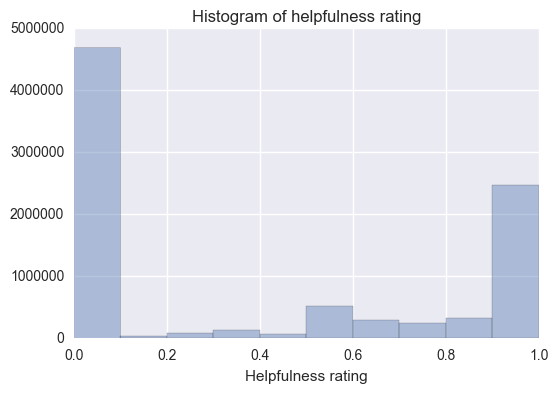

In [186]:
sns.distplot(df.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.title('Histogram of helpfulness rating')

Helpfulness are mostly 0 and 1. 

### Most active reviewers and their helpfulness ratings

#### Most active users

In [13]:
df.groupby('reviewerID').size().sort_values(ascending=False)[:15]

reviewerID
AFVQZQ8PW0L       23218
A14OJS0VWMOSWO    16090
A2F6N60Z96CAJI     5891
A320TMDV6KCFU      4212
AHUT55E980RDR      3079
A13QTZ8CIMHHG4     2947
A1K1JW1C5CUSUZ     2910
A328S9RN3U5M68     2794
A2TX179XAT5GRP     2529
A21NVBFIEQWDSG     2526
A2VKWLCNZF4ZVB     2433
A1S3C5OFU508P3     2317
A1X8VZWTOG8IS6     2299
A22RY8N8CNDF3A     2123
A1NATT3PN24QWY     2053
dtype: int64

#### Reviewer # 1

In [15]:
drev1 = df[df.reviewerID == 'AFVQZQ8PW0L']

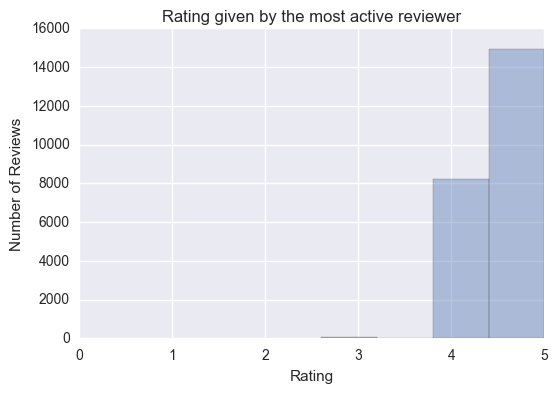

In [187]:
sns.distplot(drev1.overall, kde = False, bins = 5)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xlim([0, 5])
plt.title('Rating given by the most active reviewer')

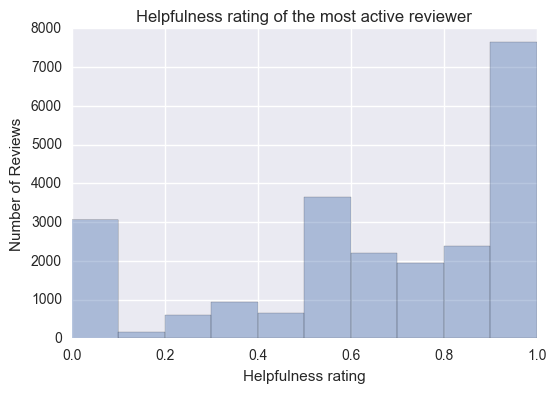

In [188]:
sns.distplot(drev1.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of the most active reviewer')

#### Let's look at another reviewer

In [22]:
drev2 = df[df.reviewerID == 'A14OJS0VWMOSWO']

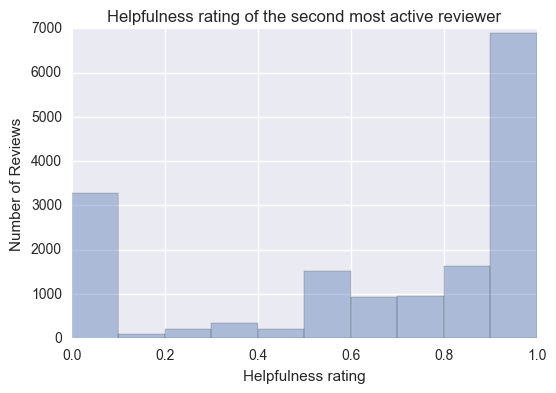

In [23]:
sns.distplot(drev2.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of the second most active reviewer')

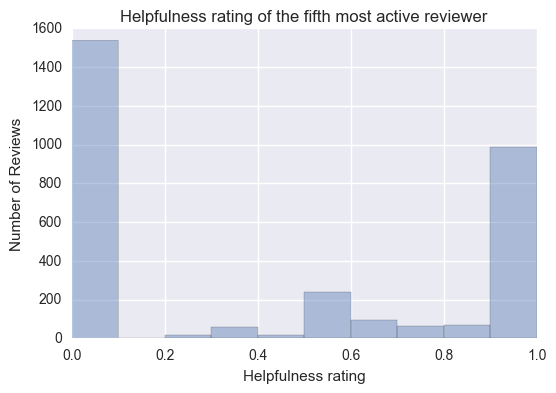

In [189]:
drev3 = df[df.reviewerID == 'AHUT55E980RDR']
sns.distplot(drev3.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of the fifth most active reviewer')

#### This reviewer has more 0 ratings than 1.  We will investigate further how ratings are associated with helpfulness with statistical testing.

#### Let's take the mean helpfulness ratings of each user 

In [34]:
df1 = df[['reviewerID', 'percHelpful']]
df1.head(1)

,reviewerID,percHelpful
0,A2H587O1MJCEL9,1.0


In [35]:
df1 = df1.groupby('reviewerID').mean()
df1.head(1)

,percHelpful
reviewerID,
A000443821AD43TOGKNGZ,0.125


#### Discard who scored below 50% on an average

In [38]:
df2 = df1[df1.percHelpful >=.50]
df2.head()

,percHelpful
reviewerID,
A00085083TSCV82430YT4,0.500000
A00190263S0ITOM6NWF9F,0.507937
A00311082372LV4OV6WJC,0.571429
A00328401T70RFN4P1IT6,0.611111
A00878773S2MNB00COHKV,0.500000


In [113]:
df.shape, df2.shape # df2 is below 50%

((8888190, 5), (3870341, 2))

In [114]:
3870341.0/8888190.0

0.435447599567516

In [47]:
df2.sort_values(by = 'percHelpful', ascending=False)[:10] 

,percHelpful
reviewerID,
A1ZN5UMPLR408T,1.0
A30723LVRC8XOA,1.0
A3J5CAEUT9120H,1.0
AF4CESG26429M,1.0
A3J57739JDWAFA,1.0
A2OT3I0QNP1TZO,1.0
A1E17CKAGNJSLY,1.0
A3330TLG8Q1UN7,1.0
A1Q1Q2YZUE2EPS,1.0


####  But many of them probably did only one review each. Therefore let's discard the 50% first and then group them together-

In [48]:
df2 = df[['reviewerID', 'percHelpful']]

In [49]:
df2 = df2[df2.percHelpful >=0.5]

In [50]:
df2.groupby('reviewerID').size().sort_values(ascending=False)[:25]

reviewerID
AFVQZQ8PW0L       17809
A14OJS0VWMOSWO    11943
A2F6N60Z96CAJI     4557
A320TMDV6KCFU      2695
A328S9RN3U5M68     2677
A1K1JW1C5CUSUZ     2447
A21NVBFIEQWDSG     2056
A1M8PP7MLHNBQB     1702
A2VKWLCNZF4ZVB     1690
A13QTZ8CIMHHG4     1659
A22RY8N8CNDF3A     1556
A2TX179XAT5GRP     1553
A1S3C5OFU508P3     1553
A1I2O9Y3X3HXLS     1523
A3M174IC0VXOS2     1484
A1NATT3PN24QWY     1477
AHUT55E980RDR      1449
A26JGAM6GZMM4V     1442
AC1K4OQOZ90RS      1352
A1MC6BFHWY6WC3     1326
AHD101501WCN1      1324
A1D2C0WDCSHUWZ     1295
A2MF2QVSCUI27G     1284
A3R19YKNL641X3     1262
A281NPSIMI1C2R     1232
dtype: int64

#### Reviewer # 1 when ratings are above 0.5 

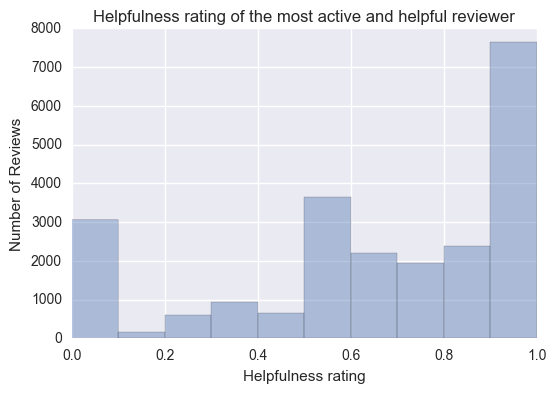

In [190]:
drev1help = df[df.reviewerID == 'AFVQZQ8PW0L']
sns.distplot(drev1help.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of the most active and helpful reviewer')

#### It's better to group the active and helpful reviewers using a range of helpfulness 

In [57]:
df.groupby(['reviewerID', 'percHelpful']).size().sort_values(ascending = False)[:25]

reviewerID      percHelpful
AFVQZQ8PW0L     1.000000       6862
A14OJS0VWMOSWO  1.000000       5884
                0.000000       3267
AFVQZQ8PW0L     0.000000       3045
                0.500000       2608
A2F6N60Z96CAJI  1.000000       2058
A320TMDV6KCFU   1.000000       1839
AFVQZQ8PW0L     0.666667       1724
A328S9RN3U5M68  1.000000       1701
AHUT55E980RDR   0.000000       1538
A1X8VZWTOG8IS6  0.000000       1461
A320TMDV6KCFU   0.000000       1445
A13QTZ8CIMHHG4  1.000000       1315
                0.000000       1262
AFVQZQ8PW0L     0.750000       1143
A2VKWLCNZF4ZVB  1.000000       1140
A21NVBFIEQWDSG  1.000000       1074
A14OJS0VWMOSWO  0.500000       1070
A2F6N60Z96CAJI  0.000000       1052
A2TX179XAT5GRP  1.000000        994
AHUT55E980RDR   1.000000        962
A1MC6BFHWY6WC3  1.000000        957
A2TX179XAT5GRP  0.000000        934
A37BRR2L8PX3R2  0.000000        931
A26J2TRDPZH7RZ  0.000000        888
dtype: int64

In [58]:
bins = [-.09, .25, 0.5, .75, 1.01 ]
bins

[-0.09, 0.25, 0.5, 0.75, 1.01]

In [59]:
group_names = ['below 25%', '25-50%', '51-75%', '76-100%']

In [69]:
df3 = df[['reviewerID', 'percHelpful']]

In [70]:
df3['category'] = pd.cut(df3.loc[:, 'percHelpful'], bins, labels=group_names)
df3.head(1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,percHelpful,category
0,A2H587O1MJCEL9,1.0,76-100%


In [72]:
pd.value_counts(df3['category'])

below 25%    4791708
76-100%      2848227
25-50%        638361
51-75%        609894
Name: category, dtype: int64

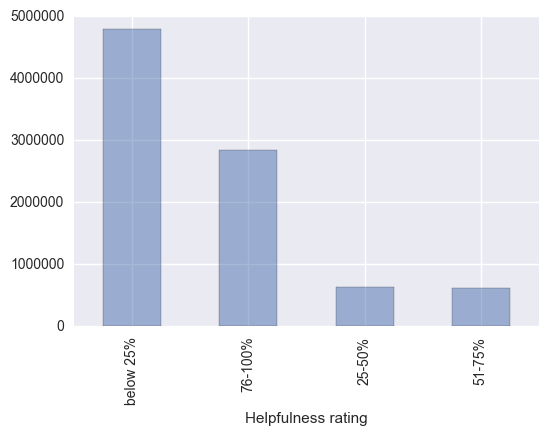

In [191]:
pd.value_counts(df3['category']).plot(kind='bar', alpha = 0.5)
plt.xlabel('Helpfulness rating')

In [82]:
g = df3.groupby(['reviewerID', 'category']).size().sort_values(ascending = False)[:25]
g.unstack().fillna('')

category,below 25%,25-50%,51-75%,76-100%
reviewerID,,,,
A13QTZ8CIMHHG4,1271,,,1452
A14OJS0VWMOSWO,3540,1677,2151,8722
A1K1JW1C5CUSUZ,,,,1881
A1M8PP7MLHNBQB,,,,1149
A1MC6BFHWY6WC3,,,,1208
A1S3C5OFU508P3,,,,1183
A1X8VZWTOG8IS6,1619,,,
A21NVBFIEQWDSG,,,,1584
A26JGAM6GZMM4V,,,,1199


In [145]:
sns.set_palette('deep')

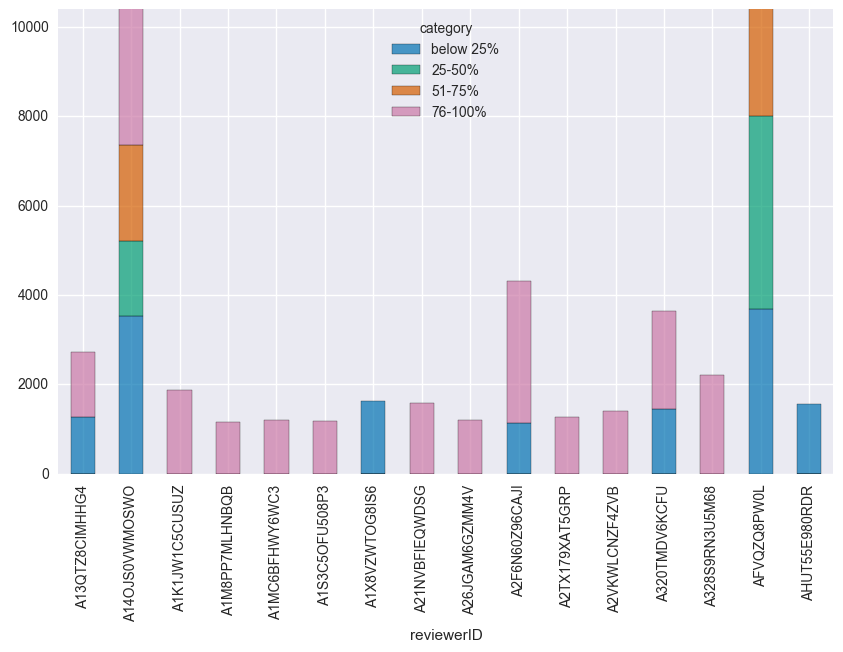

In [192]:
with sns.color_palette('colorblind', 10):
    g.unstack().plot(kind = 'bar', figsize = [10, 6], stacked = True, alpha = 0.7)
    plt.ylim([-10, 10400])

1. Reviewers with higher ratings (76-100%) have ~1000-2000 reviews but they barely have any negative rating. Book reviews are generally very opinionated, therefore its hard to believe that some of the top reviewers did not have any low ratings!!!

2. Two reviewers have written 10,000+ reviews but many of the review ratings are low.

**which reviewers to trust?** It will be interesting to see active years of these reviewers.

In [123]:
df4 = df[['reviewerID', 'percHelpful']]
df4.head(1)

,reviewerID,percHelpful
0,A2H587O1MJCEL9,1.0


In [124]:
df4.to_gbq(destination_table='amazon_book_small.rev3', project_id= project_id) # wrote the percentage helpful back to bigquery.




Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 0% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 1% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 2% Complete
Streaming Insert is 3% Complete
Streaming Insert is 3% Complete
Streaming Insert is 3% Complete
Streaming Insert is 3% Complete
Streaming Insert is 3% Complete
Strea

### Overall rating and its relation to helpfulness

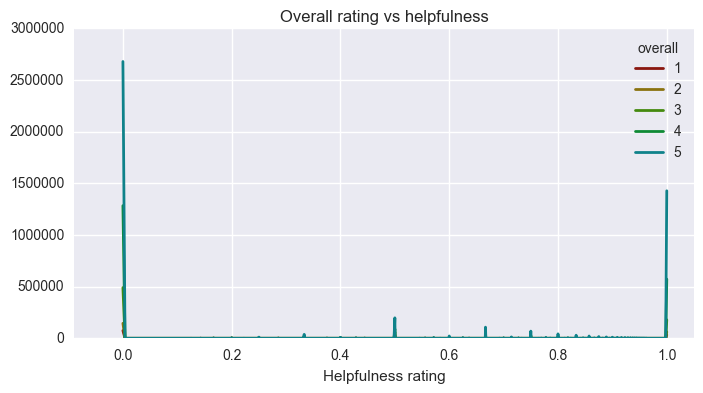

In [171]:
with sns.hls_palette(8, l=.3, s=.8):
    a = df.groupby(['overall', 'percHelpful']).size()
    a = a.unstack('overall').fillna(0)
    a.plot(kind = 'line', figsize= [8, 4], linewidth = 2.0)
    plt.xlim([-.09, 1.05])
    plt.xlabel('Helpfulness rating')
    plt.title('Overall rating vs helpfulness')

In [153]:
df5 = df[df.percHelpful >= 0.3]
df5.head(1)

,reviewerID,overall,helpfulVote,totalVote,percHelpful
0,A2H587O1MJCEL9,5,6,6,1.0


#### A closer look when below 30% are discarded

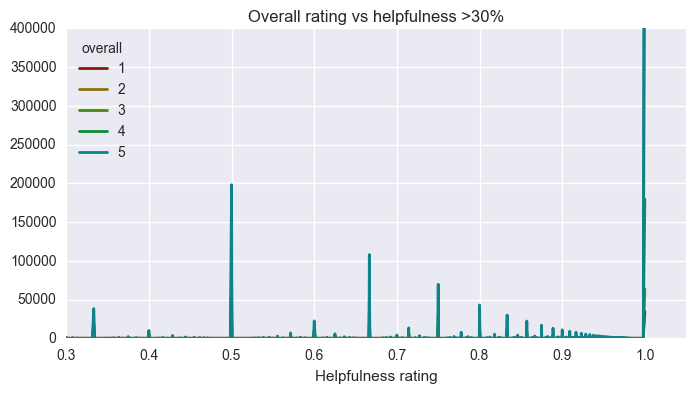

In [184]:
with sns.hls_palette(8, l=.3, s=.8):
    b = df5.groupby(['overall', 'percHelpful']).size()
    b = b.unstack('overall').fillna(0)
    b.plot(kind = 'line', figsize= [8, 4], linewidth = 2.0)
    plt.xlim([0.3, 1.05])
    plt.ylim([0, 400000])
    plt.xlabel('Helpfulness rating')
    plt.title('Overall rating vs helpfulness >30%')

### Helpfulness ratings when the reviews are positive

In [157]:
df6 = df[['reviewerID', 'overall', 'percHelpful']]
df6.head(1)

,reviewerID,overall,percHelpful
0,A2H587O1MJCEL9,5,1.0


In [185]:
df6.groupby(['reviewerID', 'overall', 'percHelpful']).size().sort_values(ascending = False)[:25]

reviewerID      overall  percHelpful
A14OJS0VWMOSWO  5        1.000000       5880
AFVQZQ8PW0L     5        1.000000       4285
A14OJS0VWMOSWO  5        0.000000       3266
AFVQZQ8PW0L     4        1.000000       2564
                5        0.000000       1706
A320TMDV6KCFU   5        1.000000       1614
AFVQZQ8PW0L     5        0.500000       1572
A2F6N60Z96CAJI  5        1.000000       1355
AFVQZQ8PW0L     4        0.000000       1333
A328S9RN3U5M68  5        1.000000       1318
A320TMDV6KCFU   5        0.000000       1262
AFVQZQ8PW0L     5        0.666667       1101
A14OJS0VWMOSWO  5        0.500000       1069
AFVQZQ8PW0L     4        0.500000       1033
A1MC6BFHWY6WC3  5        1.000000        849
A2OJW07GQRNJUT  5        0.000000        796
AFVQZQ8PW0L     5        0.750000        759
A1X8VZWTOG8IS6  4        0.000000        746
A1JLU5H1CCENWX  5        0.000000        736
AHUT55E980RDR   5        0.000000        729
A2TX179XAT5GRP  5        1.000000        712
A14OJS0VWMOSWO  5 

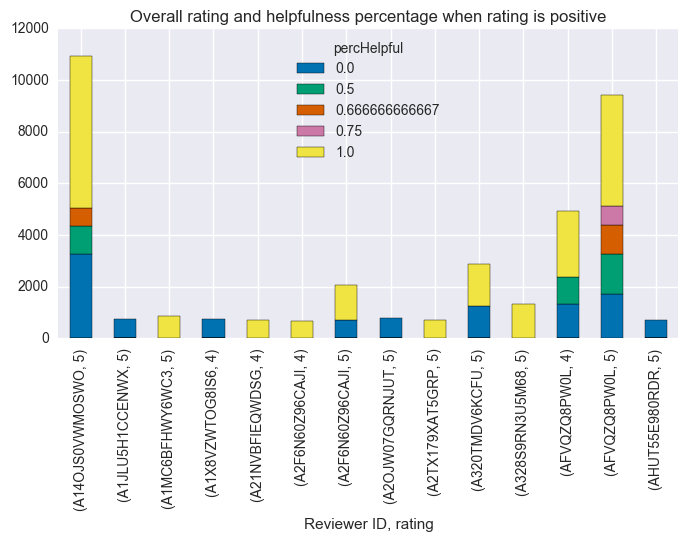

In [183]:
with sns.color_palette('colorblind', 8):
    c = df6.groupby(['reviewerID', 'overall', 'percHelpful']).size().sort_values(ascending = False)[:25]
    c = c.unstack('percHelpful').fillna(0)
    c.plot(kind = 'bar', stacked = True, figsize= [8, 4])
    plt.xlabel('Reviewer ID, rating')
    plt.title('Overall rating and helpfulness percentage when rating is positive')

### Helpfulness ratings when the reviews are negative

In [176]:
df7 = df6[df6.overall <= 2]
df7.head(1)

,reviewerID,overall,percHelpful
1,AI7E9E9BLURG1,2,1.0


In [181]:
df7.groupby(['reviewerID', 'overall', 'percHelpful']).size().sort_values(ascending = False)[:25]

reviewerID      overall  percHelpful
A3A7FF87LEVCQ1  2        0.0            185
A1CNQTCRQ35IMM  2        1.0            101
                         0.0             93
A3I8FT707XKQAJ  2        0.0             83
A3M3W5GV0HIQK4  2        1.0             63
A8MTDB180W1XE   2        0.0             61
AUUFW7PTUHLT    2        0.0             60
AH62BQTCMR3BR   1        0.0             57
A1DA6E4FNRSAWN  2        1.0             57
A2VXSQHJWZAQGY  2        0.0             56
A15NZD5WINDQZM  2        0.0             55
A1X87IHRK15RBU  2        0.0             53
A3U7ELIED4WP4R  2        0.0             53
AHUT55E980RDR   2        0.0             53
A2VXSQHJWZAQGY  2        1.0             52
A3BFDEBT5IV4UN  2        1.0             52
A20R37WRPLUM1D  2        0.0             52
A3A7FF87LEVCQ1  2        1.0             50
A1X8VZWTOG8IS6  2        0.0             49
A1O79BLZSTP53I  2        0.0             48
A27R2V3WLS43LP  2        0.0             47
A2RPIGO3G4M6GN  2        0.0           

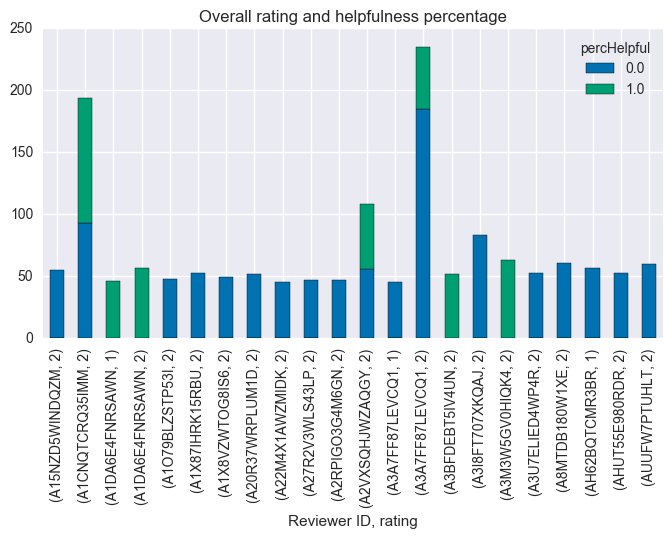

In [182]:
with sns.color_palette('colorblind', 8):
    d = df7.groupby(['reviewerID', 'overall', 'percHelpful']).size().sort_values(ascending = False)[:25]
    d = d.unstack('percHelpful').fillna(0)
    d.plot(kind = 'bar', stacked = True, figsize= [8, 4])
    plt.xlabel('Reviewer ID, rating')
    plt.title('Overall rating and helpfulness percentage when rating is negative')

### Summary

1. 57% of the helpfulness rating is below 50%. 
2. The most active reviewers are identified and ranked according to their helpfulness.
3. Overall ratings are compared to helpfulness.